### 대중교통 데이터 읽어오기
- 데이터 헤더

In [2]:
import csv

f = open('subwayfee.csv', encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data) # 한 줄을 읽고 다음 줄로 이동
print(header)
i = 1
for row in data:
    print(row)
    if i > 5:
        break
    i += 1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun.24', '1호선', '150', '서울역', '1375235 ', '1312172 ', '217760 ', '208410 ']
['Jun.24', '1호선', '151', '시청', '623388 ', '630661 ', '97573 ', '95530 ']
['Jun.24', '1호선', '152', '종각', '914353 ', '912364 ', '146932 ', '137905 ']
['Jun.24', '1호선', '153', '종로3가', '471522 ', '426339 ', '287153 ', '264801 ']
['Jun.24', '1호선', '154', '종로5가', '440595 ', '432871 ', '248630 ', '242504 ']
['Jun.24', '1호선', '155', '동대문', '231365 ', '226540 ', '129109 ', '130444 ']


### 전체 탑승 인원 대비 유임 승차 비율이 가장 높은 역은?
- 유임 승차 대 무임 승차 비율 (rate) 계산
    - rate = 유임 승차 인원 / 무임 승차 인원

In [3]:
import csv

f = open('subwayfee.csv', encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)
max_rate = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 4, 5, 6, 7 컬럼 값을 정수로 변환
    rate = row[4] / row[6]   # [6] 컬럼의 값이 0인 행 확인 용도
    if rate > max_rate:
        max_rate = rate
print(max_rate)
f.close()

ZeroDivisionError: division by zero

### 무임승차 인원이 0인 역 찾기 #1

In [4]:
import csv

f = open('subwayfee.csv', encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 4, 5, 6, 7 컬럼 값을 정수로 변환
    rate = row[4] / (row[4] + row[6])

    if row[6] == 0: # 무임승차 인원[6]이 없는 역 출력
        print(row)
f.close()

['Jun.24', '일산선', '1949', '지축', 61, 0, 0, 0]
['Jun.24', '경의선', '1296', '계양', 2, 0, 0, 0]
['Jun.24', '6호선', '2649', '신내', 10, 0, 0, 0]
['Jun.24', '7호선', '2756', '신중동', 1, 0, 0, 0]
['Jun.24', '7호선', '2761', '부평구청', 2, 0, 0, 0]


### 유동인구가 10만명 이상인 최대 유임 승차 인원이 있는 역은? #2

In [7]:
import csv

f = open('subwayfee.csv', encoding='utf-8-sig')
data = csv.reader(f)
header = next(data)
max_rate = 0
rate = 0
max_row = []
max_total_num = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    total_count = row[4] + row[6] # 유임승차수 + 무임승차수

    if (row[6] != 0) and (total_count > 100000):
        rate = row[4] / total_count
        if rate> max_rate:
            max_rate = rate
            max_row = row
            max_total_num = total_count
            print(f"역이름: {max_row[3]}, 전체 인원: {max_total_num:,}명,"
                  f"유임승차인원: {max_row[4]:,}명, "
                  f"유임승차 비율: {round(max_rate * 100, 1):,}%")
            
print('-' * 80)
print('최대 유임 승차역')
print(f"역이름: {max_row[3]}, 전체 인원: {max_total_num:,}명, "
      f"유임승차인원: {max_row[4]:,}명, "
      f"유임승차 비율: {round(max_rate * 100, 1):,}%")

f.close()

역이름: 서울역, 전체 인원: 1,592,995명,유임승차인원: 1,375,235명, 유임승차 비율: 86.3%
역이름: 시청, 전체 인원: 720,961명,유임승차인원: 623,388명, 유임승차 비율: 86.5%
역이름: 시청, 전체 인원: 708,238명,유임승차인원: 648,953명, 유임승차 비율: 91.6%
역이름: 을지로입구, 전체 인원: 1,375,810명,유임승차인원: 1,274,944명, 유임승차 비율: 92.7%
역이름: 한양대, 전체 인원: 314,730명,유임승차인원: 301,414명, 유임승차 비율: 95.8%
--------------------------------------------------------------------------------
최대 유임 승차역
역이름: 한양대, 전체 인원: 314,730명, 유임승차인원: 301,414명, 유임승차 비율: 95.8%


### 실습: 유임 승차 비율이 50% 이하인 역

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun.24', '1호선', '157', '제기동', 230693, '220271 ', 262223, '280041 '] 0.47
['Jun.24', '1호선', '159', '동묘앞', 156165, '161457 ', 163273, '162912 '] 0.49
['Jun.24', '경원선', '1916', '소요산', 14819, '14625 ', 51268, '50124 '] 0.22
['Jun.24', '경원선', '1919', '연천', 14505, '13769 ', 26975, '27796 '] 0.35
['Jun.24', '중앙선', '1218', '원덕', 4839, '4651 ', 6889, '6686 '] 0.41
['Jun.24', '중앙선', '1219', '용문', 33375, '33488 ', 41628, '41155 '] 0.44
['Jun.24', '경춘선', '1322', '상천', 5200, '4887 ', 6041, '6054 '] 0.46
['Jun.24', '우이신설선', '4707', '삼양사거리', 38157, '38113 ', 40060, '39854 '] 0.49

유임 승차 비율이 가장 낮은 역: 소요산
전체 인원: 66,087명, 유임승차인원:14,819명, 유임승차비율:22.4%


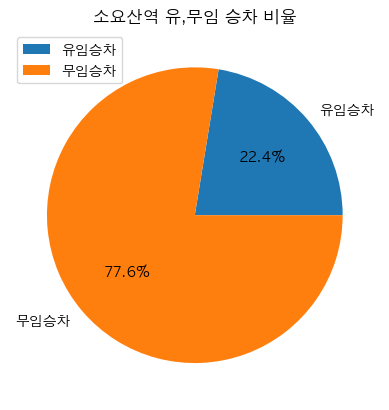

In [16]:
import csv
import matplotlib.pyplot as plt
import platform

f = open('subwayfee.csv', encoding='utf-8-sig')
data = csv.reader(f)
header = next(data)
print(header)

min_rate = 100
min_row = []
min_total_count = 0

for row in data:
    for i in [4, 6]:
        row[i] = int(row[i])
    total_count = row[4] + row[6]
    # 무임승차 인원이 없고, 총 승차인원이 1만명 이상
    if (row[6] != 0) and (total_count >= 10000):
        rate = row[4] / total_count
        if rate <= 0.5:
            print(row, round(rate, 2))
            if rate < min_rate:
                min_rate = rate
                min_row = row
                min_total_count = total_count

f.close()

print()
print(f'유임 승차 비율이 가장 낮은 역: {min_row[3]}')
print(f'전체 인원: {min_total_count:,}명, '
      f'유임승차인원:{min_row[4]:,}명, '
      f'유임승차비율:{round(min_rate*100, 1)}%')

plt.rcParams['font.family'] = 'AppleGothic'
plt.title(min_row[3] + '역 유,무임 승차 비율')
label = ['유임승차', '무임승차']
values = [min_row[4], min_row[6]]
plt.pie(values, labels = label, autopct = '%.1f%%')
plt.legend(loc = 2)
plt.show()

### 승하차 인원이 가장 많은 역은?
- 모든 역의 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원 분석

In [17]:
import csv
max = [0] * 4 # [0]: 최대 유임승차, [1]: 최대 유임하차, [2]: 최대 무임승차, [3]: 최대 무임하차
max_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

# with 구문: 자동으로 파일을 close()시킴
with open('subwayfee.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)

    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
            if row[i] > max[i-4]:    # 원본 데이터의 컬럼 (인덱스-4) -> max리스트의 인덱스
                max[i-4] = row[i]
                max_station[i-4] = row[3] + ' ' + row[1] # '역이름 지하철노선' 추가

for i in range(4):
    print(f'{label[i]}: {max_station[i]} {max[i]:,}명')

유임승차: 잠실(송파구청) 2호선 2,083,604명
유임하차: 홍대입구 2호선 2,213,946명
무임승차: 영등포 경부선 313,931명
무임하차: 영등포 경부선 314,891명


### 전체 지하철역 승하차 인원 분석 및 파이차트 저장

In [19]:
import csv
import matplotlib.pyplot as plt

label = ['유임승차', '유임하차', '무임승차', '무임하차']
color_list = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'] # 파이 차트 컬러 값
pic_count = 0
with open('subwayfee.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)

    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
        print(row)
        plt.figure(dpi = 100) # 저장할 그림파일의 dip 설정
        plt.title(row[3] + ' ' + row[1])
        plt.pie(row[4:8], labels = label, colors = color_list, autopct='%.1f%%', shadow = True)
        plt.savefig('img/' + row[3] + ' ' + row[1] + '.png')
        plt.close() # 파일 닫기

        pic_count += 1
        if pic_count >= 10:
            break

['Jun.24', '1호선', '150', '서울역', 1375235, 1312172, 217760, 208410]
['Jun.24', '1호선', '151', '시청', 623388, 630661, 97573, 95530]
['Jun.24', '1호선', '152', '종각', 914353, 912364, 146932, 137905]
['Jun.24', '1호선', '153', '종로3가', 471522, 426339, 287153, 264801]
['Jun.24', '1호선', '154', '종로5가', 440595, 432871, 248630, 242504]
['Jun.24', '1호선', '155', '동대문', 231365, 226540, 129109, 130444]
['Jun.24', '1호선', '156', '신설동', 287903, 276799, 122597, 118990]
['Jun.24', '1호선', '157', '제기동', 230693, 220271, 262223, 280041]
['Jun.24', '1호선', '158', '청량리(서울시립대입구)', 397655, 379680, 287057, 290189]
['Jun.24', '1호선', '159', '동묘앞', 156165, 161457, 163273, 162912]


### 시간대별 지하철 이용 인원 수
- 새벽 4시 지하철 승차 전체 인원

In [23]:
import csv

result = []
total_number = 0
with open('subwaytime.csv', encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data) # 2줄의 헤더 정보를 건너뜀
    next(data)
    for row in data:
        row[4:] = map(int, row[4:]) # 문자열을 숫자로 변경 후 원래의 위치에 저장
        total_number += row[4]
        result.append(row[4]) # 새벽 4시 승차인원을 result 리스트에 추가

print(f'총 지하철 역의 수: {len(result)}')
print(f'새벽 4시 승차인원: {total_number:,}')

총 지하철 역의 수: 622
새벽 4시 승차인원: 161,079


### 새벽 4시 지하철 이용 인원 수 (그래프)

새벽 4시 총 승차 인원수: 161,079
최대 승차역: 구로, 인원수:13,041


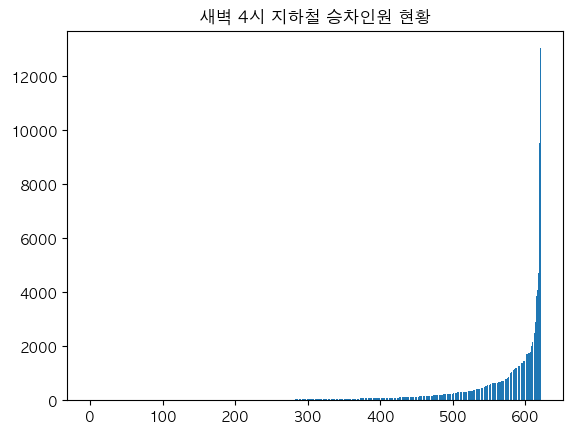

In [25]:
import csv
import matplotlib.pyplot as plt

with open('subwaytime.csv', encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data) # 2줄의 헤더 정보를 건너뜀
    next(data)
    result = []
    total_number = 0
    max_num = -1
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])
        if row[4] > max_num:
            max_num = row[4]
            max_station = row[3]

print(f'새벽 4시 총 승차 인원수: {total_number:,}')
print(f'최대 승차역: {max_station}, 인원수:{max_num:,}')
result.sort()   # 오름 차순으로 정렬 result.sort(reverse = True)
plt.figure(dpi = 100)
plt.bar(range(len(result)), result)
plt.title('새벽 4시 지하철 승차인원 현황')
plt.show()

### 출근 시간대 승차 인원이 많은 10개의 역 이름 찾기 #1

[1]: 신림(2호선) 580,615
[2]: 구로디지털단지(2호선) 419,180
[3]: 잠실(송파구청)(2호선) 408,219
[4]: 서울대입구(관악구청)(2호선) 393,990
[5]: 신도림(2호선) 357,135
[6]: 까치산(5호선) 331,049
[7]: 연신내(3호선) 327,882
[8]: 화곡(5호선) 320,069
[9]: 쌍문(4호선) 317,940
[10]: 수유(강북구청)(4호선) 299,724


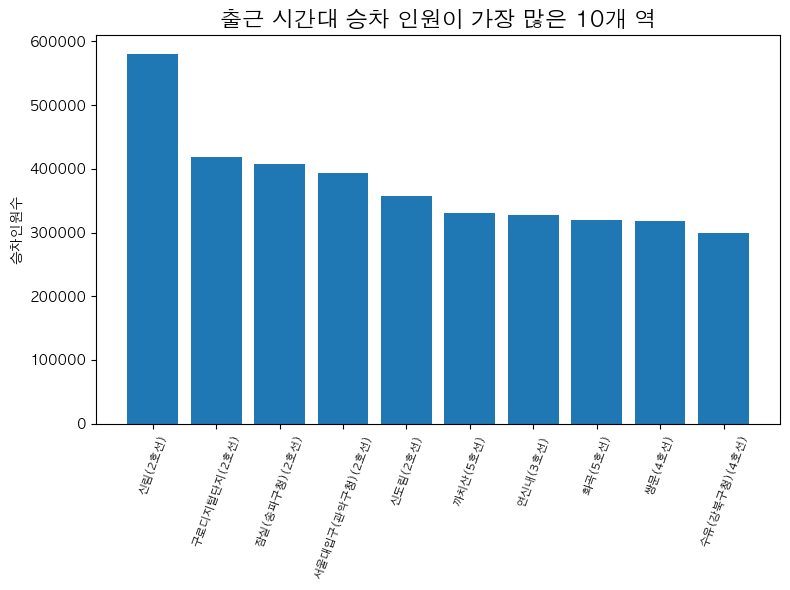

In [30]:
import csv
import matplotlib.pyplot as plt

with open('subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)  # 2줄의 헤더 정보 건너뜀
    next(data)

    station_list = []
    max_num = -1
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        passenger_num = sum(row[10:15:2]) # index 10, 12, 14

        station_name = row[3] + '(' + row[1] + ')'
        station_list.append((station_name, passenger_num))

sorted_passenger_list = sorted(station_list,
                               key = lambda x : x[1],
                               reverse = True)

index = 1
for station in sorted_passenger_list[:10]:
    print(f'[{index}]: {station[0]} {station[1]:,}')
    index += 1

station_name, station_passenger = zip(*sorted_passenger_list[:10])

# zip(*리스트): 아래 for 구문과 동일 기능
# for name, num in sorted_passenger_list[:10]:
#     station_name.append(name)
#     station_passenger.append(num)

plt.figure(figsize = (8, 6))

plt.title('출근 시간대 승차 인원이 가장 많은 10개 역', size = 16)
plt.bar(range(len(station_passenger)), station_passenger)

plt.xticks(range(len(station_name)), station_name,
           rotation = 70, fontsize = 8)

plt.ylabel('승차인원수')
plt.tight_layout() # 최소한의 여백 생성

plt.show()

### 시간대별 가장 많이 승차하는 역 정보 분석 #1

[4시 구로]: 13,041
[5시 부천]: 40,934
[6시 신림]: 67,569
[7시 신림]: 172,920
[8시 신림]: 250,103
[9시 신림]: 157,592
[10시 신림]: 91,388
[11시 잠실(송파구청)]: 87,311
[12시 잠실(송파구청)]: 97,515
[13시 잠실(송파구청)]: 107,172
[14시 잠실(송파구청)]: 116,532
[15시 잠실(송파구청)]: 140,539
[16시 잠실(송파구청)]: 166,757
[17시 강남]: 239,429
[18시 강남]: 298,631
[19시 강남]: 197,594
[20시 홍대입구]: 168,814
[21시 홍대입구]: 198,064
[22시 홍대입구]: 191,740
[23시 홍대입구]: 98,253
[0시 홍대입구]: 12,130
[1시 신도림]: 17
[2시 개화]: 4


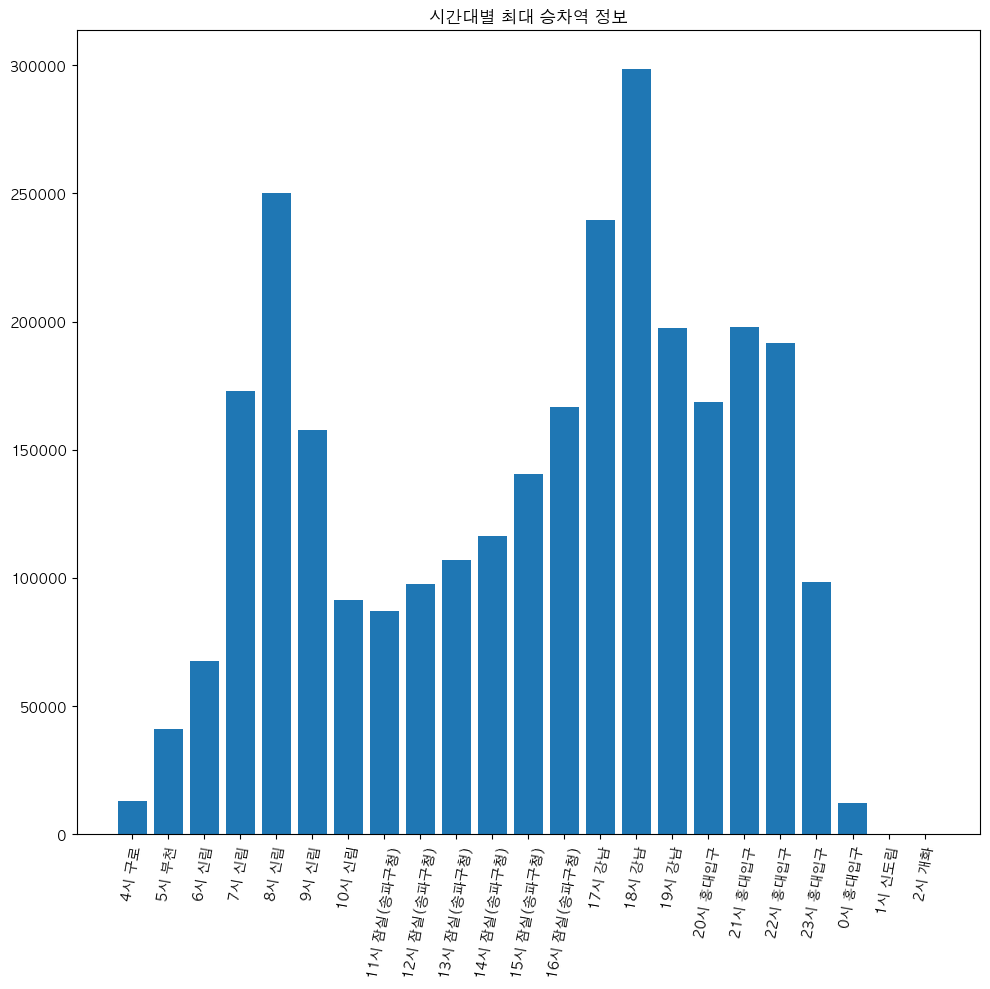

In [34]:
import csv
import matplotlib.pyplot as plt

with open('subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)  # 2줄의 헤더 정보 건너뜀
    next(data)
    max = [0] * 23 # 새벽 3시는 지하철 운행 안함
    max_station = [''] * 23
    xtick_list = []

    for i in range(4, 27):
        n = i % 24
        xtick_list.append(str(n))

    for row in data:
        row[4:] = map(int, row[4:])
        for j in range(23):
            a = row[j * 2 + 4] # j = 0: data[0 * 2 + 4]의 값을 max[0]에 저장하기 위함
            if a > max[j]:
                max[j] = a
                max_station[j] = xtick_list[j] + '시 ' + row[3] # 4시: 구로

    for i in range(len(max)):
        print(f'[{max_station[i]}]: {max[i]:,}')

plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize = (10, 10))
plt.title('시간대별 최대 승차역 정보')
plt.bar(range(23), max)
plt.xticks(range(23), labels = max_station, rotation = 80)
plt.tight_layout()
plt.show()

### 모든 지하철역에서 시간대별 승하차 인원 #2

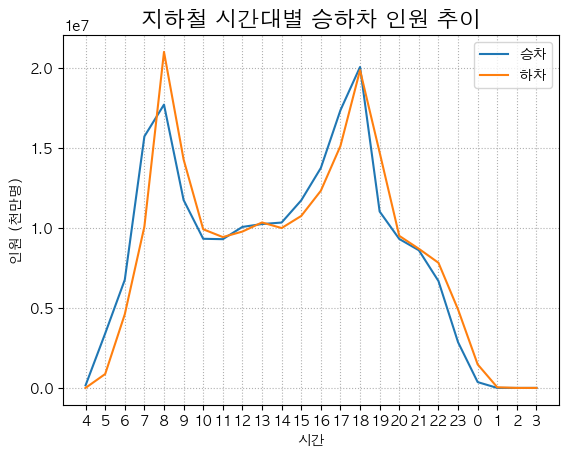

In [35]:
import csv
import matplotlib.pyplot as plt

with open('subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)  # 2줄의 헤더 정보 건너뜀
    next(data)
    subway_in = [0] * 24 # 승차 인원 저장 리스트
    subway_out = [0] * 24 # 하차 인원 저장 리스트

    for row in data:
        row[4:] = map(int, row[4:])
        for i in range(24):
            subway_in[i] += row[4+i*2]
            subway_out[i] += row[5+i*2]

xtick_list = []
for i in range(4, 28):
    n = i % 24
    xtick_list.append(str(n))

plt.figure(dpi = 100)
plt.title('지하철 시간대별 승하차 인원 추이', size = 16)
plt.grid(linestyle = ':') # 그리드 라인 표시
plt.plot(subway_in, label = '승차')
plt.plot(subway_out, label = '하차')
plt.legend()

plt.xticks(range(24), labels = xtick_list)
plt.xlabel('시간')
plt.ylabel('인원 (천만명)')
plt.show()

### 지하철 시간대별 이용 현황: 엑셀 파일 및 Pandas 활용 #1

In [45]:
import pandas as pd
from tabulate import tabulate

# 지하철 시간대별 이용현황
df = pd.read_excel('subway.xls', sheet_name = '지하철 시간대별 이용현황', header = [0, 1])
df.head()

사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2024-06                1호선                150                서울역   
1            2024-06                1호선                151                 시청   
2            2024-06                1호선                152                 종각   
3            2024-06                1호선                153               종로3가   
4            2024-06                1호선                154               종로5가   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               654  20             8,727  9,083            13,812  56,637   
1                74   0             2,105  5,374             4,050  25,949   
2               132   7             4,291  5,787             4,312  32,747   
3               206  13             4,296  3,015             3,961  13,851   
4                42   2             2,053  3,522             3,089  17,690   

   ... 23:00:00~23:59:59 00:00:00~00:59:59        01:00:00~01:59:59       \
   ...                하차                승차     하차                승차   하차   
0  ...            13,883             2,863  3,984                 3  215   
1  ...             3,898               502    991                 1   38   
2  ...             4,587             1,676  1,300                 0    0   
3  ...             5,240             1,765  2,042                 2    6   
4  ...             3,597               334  1,000                 0    0   

  02:00:00~02:59:59    03:00:00~03:59:59                    작업일시  
                 승차 하차                승차 하차  Unnamed: 52_level_1  
0                 0  0                 0  0  2024-07-03 09:31:29  
1                 0  0                 0  0  2024-07-03 09:31:29  
2                 0  0                 0  0  2024-07-03 09:31:29  
3                 0  0                 0  0  2024-07-03 09:31:29  
4                 0  0                 0  0  2024-07-03 09:31:29  

[5 rows x 53 columns]

In [48]:
print(tabulate(df, headers = 'keys', tablefmt='pretty'))

+-----+----------------------------------+----------------------------------+--------------------------------+------------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+-------------------------------+---------------------

### 지하철 시간대별 이용 현황: 엑셀 파일 및 Pandas 활용 #2

In [51]:
print(df.columns)

MultiIndex([(              '사용월',  'Unnamed: 0_level_1'),
            (              '호선명',  'Unnamed: 1_level_1'),
            (              '역ID',  'Unnamed: 2_level_1'),
            (             '지하철역',  'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                  '승차'),
            ('04:00:00~04:59:59',                  '하차'),
            ('05:00:00~05:59:59',                  '승차'),
            ('05:00:00~05:59:59',                  '하차'),
            ('06:00:00~06:59:59',                  '승차'),
            ('06:00:00~06:59:59',                  '하차'),
            ('07:00:00~07:59:59',                  '승차'),
            ('07:00:00~07:59:59',                  '하차'),
            ('08:00:00~08:59:59',                  '승차'),
            ('08:00:00~08:59:59',                  '하차'),
            ('09:00:00~09:59:59',                  '승차'),
            ('09:00:00~09:59:59',                  '하차'),
            ('10:00:00~10:59:59',                  '승차'),
            ('

In [43]:
print(df[('호선명', 'Unnamed: 1_level_1')])

0      1호선
1      1호선
2      1호선
3      1호선
4      1호선
      ... 
617    신림선
618    신림선
619    신림선
620    신림선
621    신림선
Name: (호선명, Unnamed: 1_level_1), Length: 622, dtype: object


In [52]:
print(df[('지하철역', 'Unnamed: 3_level_1')])

0           서울역
1            시청
2            종각
3          종로3가
4          종로5가
         ...   
617          당곡
618          신림
619          서원
620     서울대벤처타운
621    관악산(서울대)
Name: (지하철역, Unnamed: 3_level_1), Length: 622, dtype: object


### 지하철 시간대별 이용 현황: 엑셀 파일 및 Pandas 활용 #3

In [53]:
commute_time_df = df.iloc[:, [1, 3, 10, 12, 14]]
print(tabulate(commute_time_df.head(), headers = 'keys', tablefmt='psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   | ('07:00:00~07:59:59', '승차')   | ('08:00:00~08:59:59', '승차')   | ('09:00:00~09:59:59', '승차')   |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               | 40,205                          | 68,945                          | 68,501                          |
|  1 | 1호선                              | 시청                                 | 7,703                           | 10,616                          | 12,972                          |
|  2 | 1호선                              | 종각                                 | 6,588             

### 지하철 시간대별 이용 현황: 엑셀 파일 및 Pandas 활용 #4

In [55]:
print(commute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                    object
08:00:00~08:59:59  승차                    object
09:00:00~09:59:59  승차                    object
dtype: object


In [60]:
commute_time_df.loc[:,('07:00:00~07:59:59', '승차')] = commute_time_df.loc[:,('07:00:00~07:59:59', '승차')].apply(lambda x : x.replace(',', ''))
commute_time_df.loc[:,('08:00:00~08:59:59', '승차')] = commute_time_df.loc[:,('08:00:00~08:59:59', '승차')].apply(lambda x : x.replace(',', ''))
commute_time_df.loc[:,('09:00:00~09:59:59', '승차')] = commute_time_df.loc[:,('09:00:00~09:59:59', '승차')].apply(lambda x : x.replace(',', ''))

print(tabulate(commute_time_df.head(), headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   |   ('07:00:00~07:59:59', '승차') |   ('08:00:00~08:59:59', '승차') |   ('09:00:00~09:59:59', '승차') |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               |                           40205 |                           68945 |                           68501 |
|  1 | 1호선                              | 시청                                 |                            7703 |                           10616 |                           12972 |
|  2 | 1호선                              | 종각                                 |                   

### 지하철 시간대별 이용 현황: 엑셀 파일 및 Pandas 활용 #5

In [61]:
commute_time_df = commute_time_df.astype({('07:00:00~07:59:59', '승차') : 'int64'})
commute_time_df = commute_time_df.astype({('08:00:00~08:59:59', '승차') : 'int64'})
commute_time_df = commute_time_df.astype({('09:00:00~09:59:59', '승차') : 'int64'})
print(commute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object


In [64]:
commute_time_df

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,40205,68945,68501
1,1호선,시청,7703,10616,12972
2,1호선,종각,6588,10892,13378
3,1호선,종로3가,5968,10284,15280
4,1호선,종로5가,5783,10330,15744
...,...,...,...,...,...
617,신림선,당곡,13139,18938,12427
618,신림선,신림,4143,6575,4125
619,신림선,서원,12816,18655,11716


In [62]:
row_sum_df = commute_time_df.sum(axis = 1, numeric_only=True)
passenger_number_list = row_sum_df.to_list()
print(row_sum_df)

0      177651
1       31291
2       30858
3       31532
4       31857
        ...  
617     44504
618     14843
619     43187
620     97128
621     17160
Length: 622, dtype: int64


### 지하철 시간대별 이용 현황: 엑셀 파일 및 Pandas 활용 #6

In [67]:
max_number = row_sum_df.max(axis = 0) # 해당 열에서 최대값 찾기
print(max_number)

580615


In [69]:
max_index = row_sum_df.idxmax()
max_line, max_station = df.iloc[max_index, [1, 3]] # 최대값의 [1]: 호선,[3]: 지하철역명

print(f'출근 시간대 최대 승차 인원역: {max_line} {max_station} {max_number:,}명')

출근 시간대 최대 승차 인원역: 2호선 신림 580,615명


### 지하철 시간대별 이용 현황: 엑셀 파일 및 Pandas 활용 #7

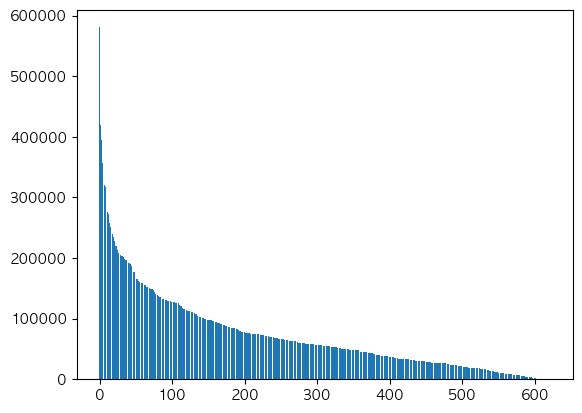

In [72]:
import matplotlib.pyplot as plt

passenger_number_list.sort(reverse = True)
plt.figure(dpi = 100)
plt.bar(range(len(passenger_number_list)), passenger_number_list)
plt.show()

### key 매개변수 #3: 여러 항목을 가지는 리스트 정렬

In [93]:
students = [('Alice', 3.9, 20160303),
            ('Bob', 3.0, 20160302),
            ('Charlie', 4.3, 20160301)]

# 학번(students[2])을 기준으로 오름차순 정렬
sorted_students1 = sorted(students, key = lambda x : x[2])
print(sorted_students1)

# 학점(students[1]을 기준으로 내림차순 정렬
sorted_students2 = sorted(students, key = lambda x : x[1], reverse = True)
print(sorted_students2)

# 기준 없이 오름차순
print('-' * 50)
print('sorted key입력 없음')
print(sorted(students))
print('-' * 50)

[('Charlie', 4.3, 20160301), ('Bob', 3.0, 20160302), ('Alice', 3.9, 20160303)]
[('Charlie', 4.3, 20160301), ('Alice', 3.9, 20160303), ('Bob', 3.0, 20160302)]
--------------------------------------------------
sorted key입력 없음
[('Alice', 3.9, 20160303), ('Bob', 3.0, 20160302), ('Charlie', 4.3, 20160301)]
--------------------------------------------------


### key 매개변수 #4: 람다식을 활용한 객체 정렬

In [97]:
class Student:
    def __init__(self, name, grade, number):
        self.name = name
        self.grade = grade
        self.number = number

    def __repr__(self):
        return f'({self.name}, {self.grade}, {self.number})'

# Student 객체 리스트 생성
students = [Student('홍길동', 3.9, 20240303),
            Student('김유신', 3.0, 20240302),
            Student('박문수', 4.3, 20240301)]

print(students[0])

print('-' * 50)
print('Student객체의 name을 기준으로 정렬')
sorted_list = sorted(students, key = lambda x : x.name)
print(sorted_list)

print('-' * 50)
print('Student객체의 grade를 기준으로 정렬')
sorted_grade_list = sorted(students, key = lambda x : x.grade)
print(sorted_grade_list)

(홍길동, 3.9, 20240303)
--------------------------------------------------
Student객체의 name을 기준으로 정렬
[(김유신, 3.0, 20240302), (박문수, 4.3, 20240301), (홍길동, 3.9, 20240303)]
--------------------------------------------------
Student객체의 grade를 기준으로 정렬
[(김유신, 3.0, 20240302), (홍길동, 3.9, 20240303), (박문수, 4.3, 20240301)]
